# Τεχνικές Εξόρυξης Δεδομένων - Exercise 2

**Ερρίκος Γκουτιέρρες-Φερνάντες ΑΜ: 1115201400037** <br> **Κωνσταντίνος Μαραγκός         ΑΜ: 1115201400095**

# Get data and explore

In [1]:
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

%matplotlib inline


data = pd.read_csv("crime.csv")
print data.shape
data.head()

(327820, 17)


/home/errikos/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


In [2]:
print "Data types: \n"
print data.dtypes

Data types: 

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object


In [3]:
print "Column values: \n"
print data.columns.values

Column values: 

['INCIDENT_NUMBER' 'OFFENSE_CODE' 'OFFENSE_CODE_GROUP'
 'OFFENSE_DESCRIPTION' 'DISTRICT' 'REPORTING_AREA' 'SHOOTING'
 'OCCURRED_ON_DATE' 'YEAR' 'MONTH' 'DAY_OF_WEEK' 'HOUR' 'UCR_PART'
 'STREET' 'Lat' 'Long' 'Location']


#### Fix column "Shootings", as indicated by the exercise

In [4]:
# Calculatin the # of NaN values in each row
data.isnull().sum() / data.shape[0]

INCIDENT_NUMBER        0.000000
OFFENSE_CODE           0.000000
OFFENSE_CODE_GROUP     0.000000
OFFENSE_DESCRIPTION    0.000000
DISTRICT               0.005412
REPORTING_AREA         0.000000
SHOOTING               0.996782
OCCURRED_ON_DATE       0.000000
YEAR                   0.000000
MONTH                  0.000000
DAY_OF_WEEK            0.000000
HOUR                   0.000000
UCR_PART               0.000284
STREET                 0.033485
Lat                    0.062937
Long                   0.062937
Location               0.000000
dtype: float64

In [5]:
# display the unique values of row shootings - and fix
data['SHOOTING'].unique()

array([nan, 'Y'], dtype=object)

In [6]:
data['SHOOTING'] = data['SHOOTING'].apply(lambda x: 'N' if x != 'Y' else 'Y')
data['SHOOTING'].unique()

array(['N', 'Y'], dtype=object)

In [7]:
print "Count of 'N' values present now: ", (data["SHOOTING"] == 'N').sum()
print "Count of 'Y' values (unchanged): ", (data["SHOOTING"] == "Y").sum()

Count of 'N' values present now:  326765
Count of 'Y' values (unchanged):  1055


## Question 1

Group incidents

In [8]:
print "Incident count grouped by year:\n"
dfy = data.groupby('YEAR')['INCIDENT_NUMBER'].count()
print dfy

Incident count grouped by year:

YEAR
2015     53392
2016     99134
2017    100938
2018     74356
Name: INCIDENT_NUMBER, dtype: int64


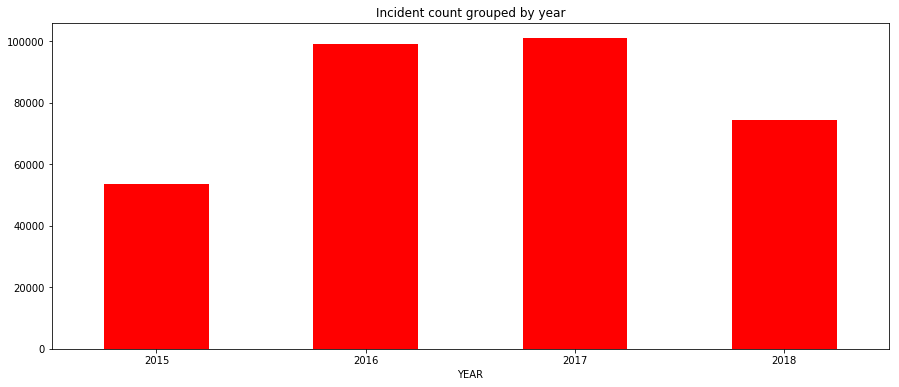

In [9]:
dfy.plot.bar(color="r", align="center", figsize=(15,6), title="Incident count grouped by year", rot=360)

In [10]:
print "Incident count grouped by month:\n"
dfm = data.groupby('MONTH')['INCIDENT_NUMBER'].count()
print dfm

Incident count grouped by month:

MONTH
1     23625
2     21661
3     24156
4     24108
5     26242
6     30622
7     34640
8     35137
9     34023
10    26437
11    23685
12    23484
Name: INCIDENT_NUMBER, dtype: int64


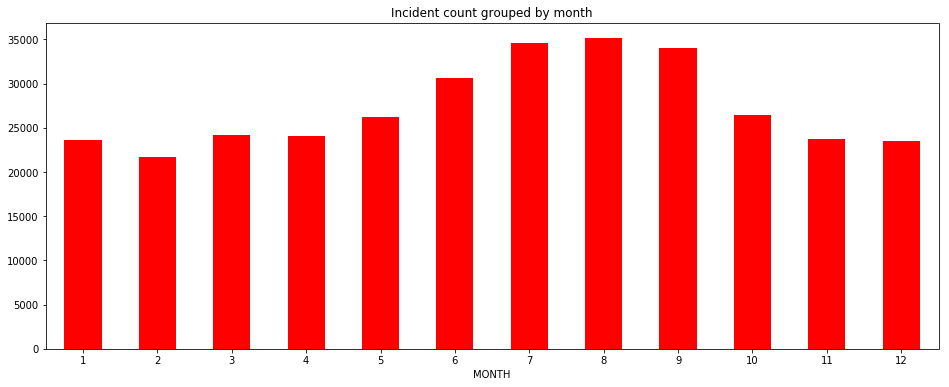

In [11]:
dfm.plot.bar(color="r", align="center", figsize=(16,6), title="Incident count grouped by month", rot=360)

In [12]:
print "Incident count grouped by day of week:\n"
dfd = data.groupby('DAY_OF_WEEK')['INCIDENT_NUMBER'].count()
print dfd

Incident count grouped by day of week:

DAY_OF_WEEK
Friday       49758
Monday       46970
Saturday     45969
Sunday       41374
Thursday     47872
Tuesday      47726
Wednesday    48151
Name: INCIDENT_NUMBER, dtype: int64


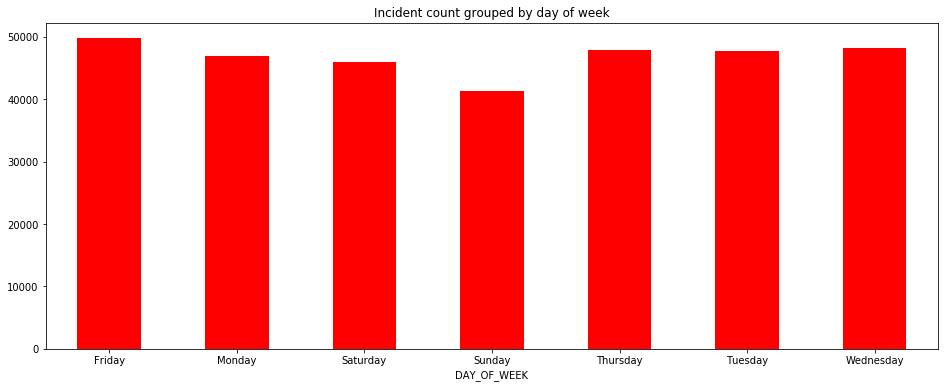

In [13]:
dfd.plot.bar(color="r", align="center", figsize=(16,6), title="Incident count grouped by day of week", rot=360)

In [14]:
print "Incident count grouped by day of week:\n"
dfdis = data.groupby('DISTRICT')['INCIDENT_NUMBER'].count()
print dfdis

Incident count grouped by day of week:

DISTRICT
A1     36735
A15     6663
A7     13634
B2     51288
B3     36400
C11    43817
C6     24190
D14    20632
D4     43338
E13    17981
E18    17825
E5     13543
Name: INCIDENT_NUMBER, dtype: int64


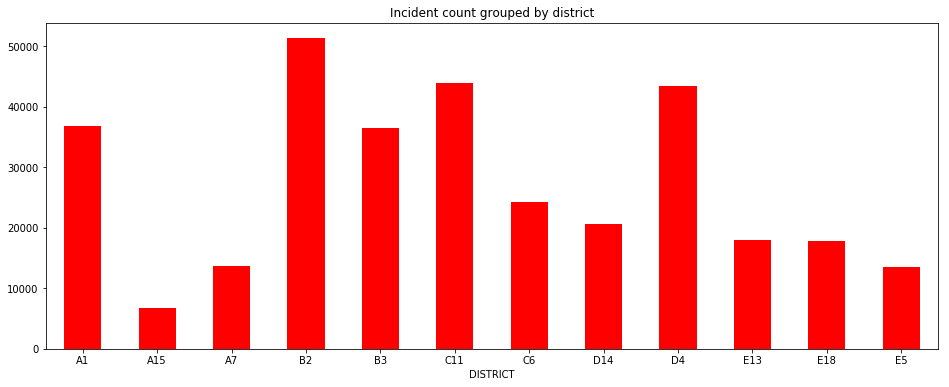

In [15]:
dfdis.plot.bar(color="r", align="center", figsize=(16,6), title="Incident count grouped by district", rot=360)

## Question 2

Analyze shootings

In [16]:
st_data = data.loc[data["SHOOTING"]=='Y']
st_data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
1052,I182078893,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,C11,416,Y,2018-09-29 21:12:00,2018,9,Saturday,21,Part One,WASHINGTON ST,42.281647,-71.071118,"(42.28164735, -71.07111848)"
1053,I182078893,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,C11,416,Y,2018-09-29 21:12:00,2018,9,Saturday,21,Part Two,WASHINGTON ST,42.281647,-71.071118,"(42.28164735, -71.07111848)"
1074,I182078872,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,330,Y,2018-09-29 19:21:00,2018,9,Saturday,19,Part One,SEAVER ST,42.304554,-71.082954,"(42.30455372, -71.08295366)"
1907,I182077958,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B3,428,Y,2018-09-26 20:20:00,2018,9,Wednesday,20,Part One,MORTON ST,42.283746,-71.089382,"(42.28374593, -71.08938232)"
1908,I182077958,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,B3,428,Y,2018-09-26 20:20:00,2018,9,Wednesday,20,Part Two,MORTON ST,42.283746,-71.089382,"(42.28374593, -71.08938232)"


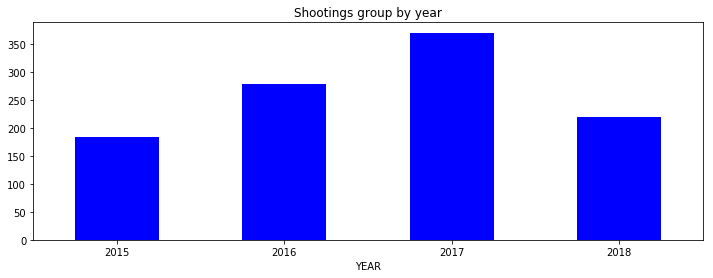

In [17]:
sd1 = st_data.groupby('YEAR')['INCIDENT_NUMBER'].count()
sd1.plot.bar(color='b', align="center", figsize=(12,4), title="Shootings group by year", rot=360)

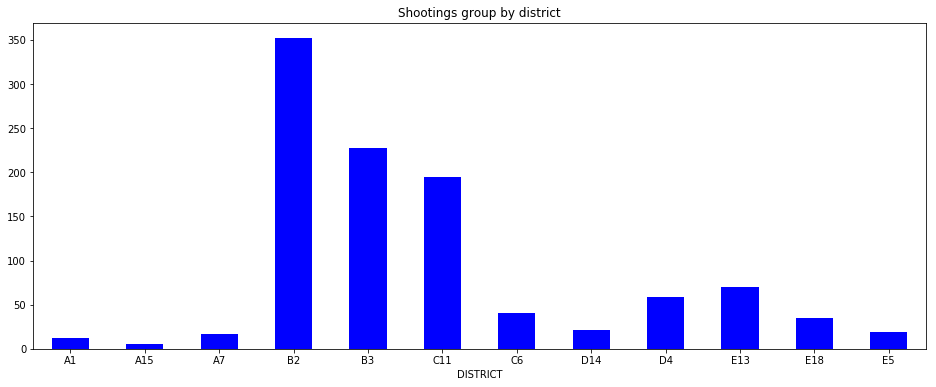

In [18]:
sd2 = st_data.groupby('DISTRICT')['INCIDENT_NUMBER'].count()
sd2.plot.bar(color='b', align="center", figsize=(16,6), title="Shootings group by district", rot=360)

***Conclusion***

In [19]:
print "More shooting happened in the year: ", sd1[sd1==sd1.max()].index[0], ", with ", sd1.max(), "shootings"

More shooting happened in the year:  2017 , with  371 shootings


In [20]:
print "More shootings happened in district: ", sd2[sd2==sd2.max()].index[0], ", with ", sd2.max(), "shootings"

More shootings happened in district:  B2 , with  352 shootings


## Question 3

Make new column day_time

In [21]:
data['day_night'] = np.where(np.logical_and(np.greater(data["HOUR"],6), np.less(data["HOUR"], 18)), 'Day', 'Night')
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,day_night
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,N,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)",Night
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,N,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)",Night
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,N,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)",Night
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,N,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)",Night
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,N,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)",Night


In [22]:
#find about day
day_data = data.loc[data["day_night"]=='Day']
count1 = day_data.groupby('day_night')['INCIDENT_NUMBER'].count()

#find about night
night_data = data.loc[data["day_night"]=='Night']
count2 = night_data.groupby('day_night')['INCIDENT_NUMBER'].count()

print count1, "\n", count2, "\n"

day_night
Day    184268
Name: INCIDENT_NUMBER, dtype: int64 
day_night
Night    143552
Name: INCIDENT_NUMBER, dtype: int64 



***Conclusion***

In [23]:
print "More crimes have happened at day!" if count1[0] > count2[0] else "More crimes have happened at night"

More crimes have happened at day!


Show values in graph (pie)

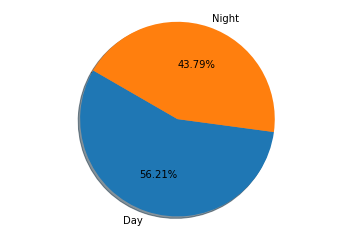

In [24]:
plt.pie([count1,count2],labels=["Day","Night"],autopct='%1.2f%%', shadow=True, startangle=150)
plt.axis('equal')
plt.show()

## Question 4

Find offense type in day

In [25]:
#redefine...
day_data = data.loc[data["day_night"]=='Day']
#off_data = day_data.groupby('OFFENSE_CODE_GROUP')['INCIDENT_NUMBER'].count()

off_data = day_data.iloc[:, 2]
dic = {}

for o in off_data:
    s = str(o)
    if s in dic:
        dic[s] += 1
    else:
        dic[s] = 1

offenses = list(dic.keys())
counts = list(dic.values())

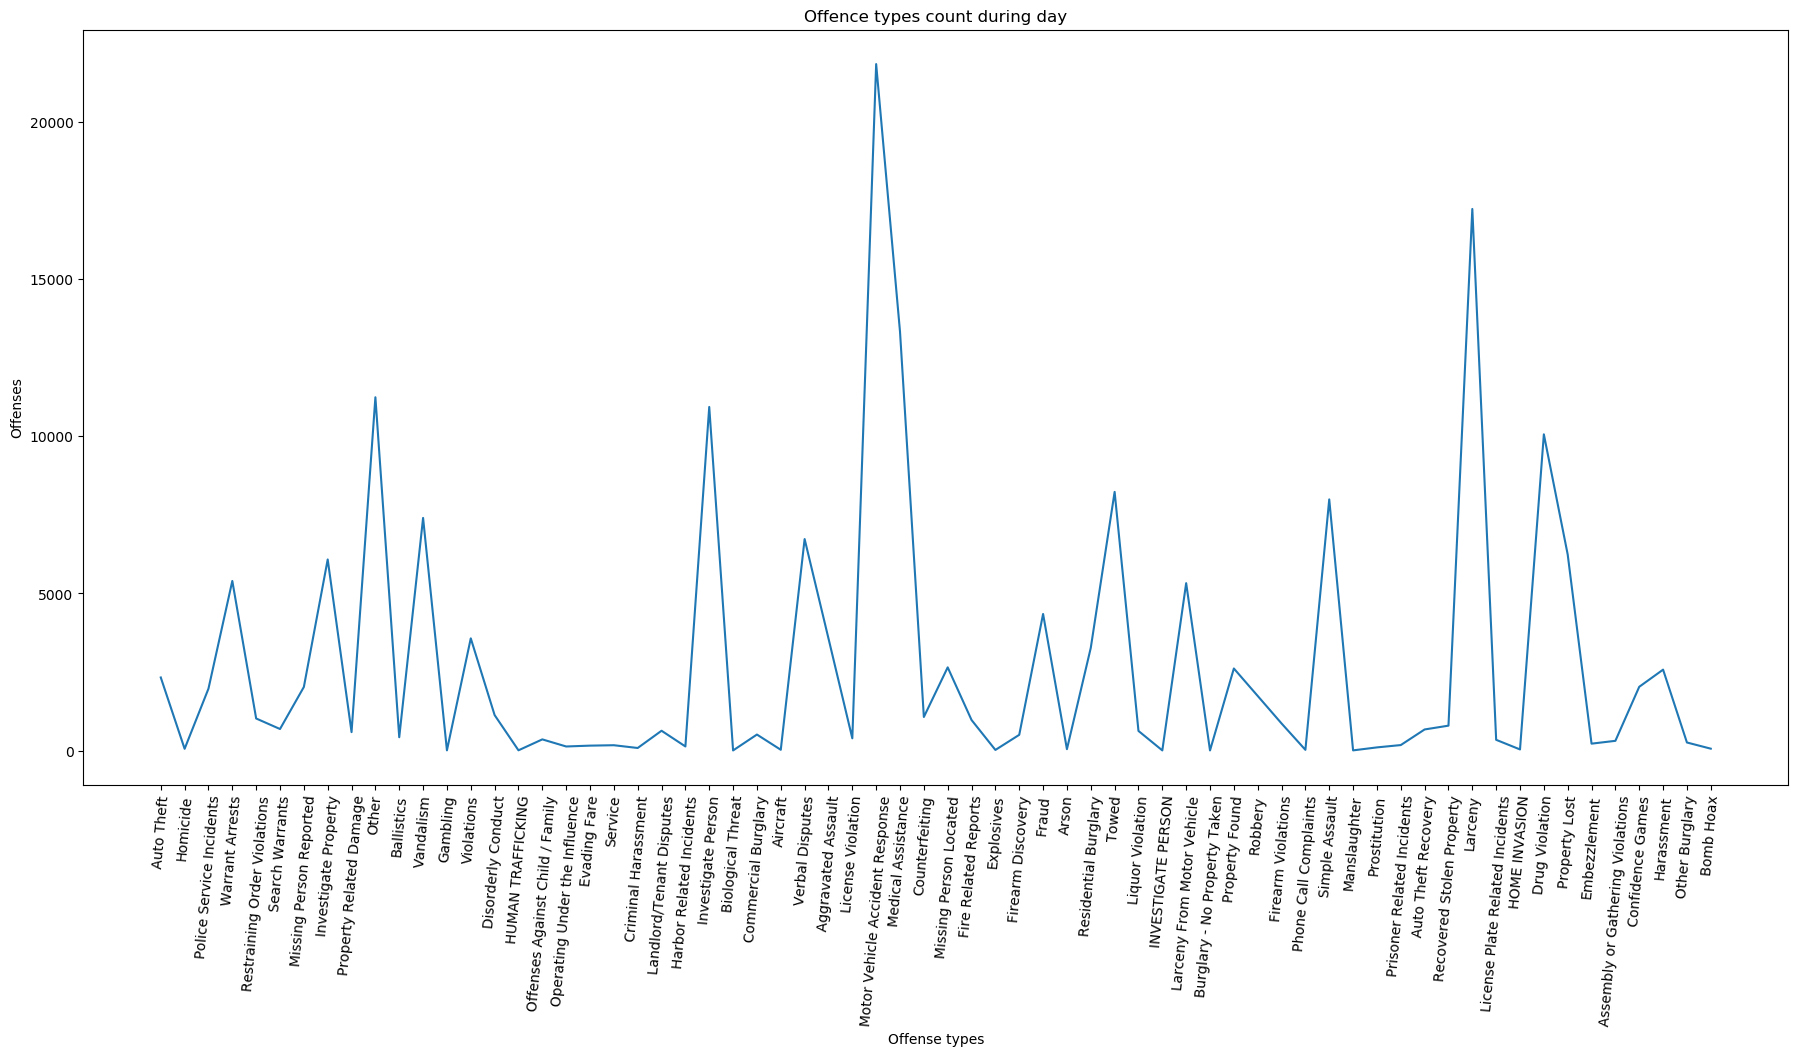

In [26]:
#plot to show results

plt.figure(figsize=(22, 10), dpi=100)
plt.plot(offenses, counts)
plt.xticks(rotation=85)
plt.xlabel('Offense types')
plt.ylabel('Offenses')
plt.title('Offence types count during day')
plt.show()

***Conclusion***

In [27]:
import operator

key =  max(dic.iteritems(), key=operator.itemgetter(1))[0]
print "Most common offense during daytime is", key, ", with ", dic[key], "occurences"

Most common offense during daytime is Motor Vehicle Accident Response , with  21852 occurences


## Question 5

Seaborn - example 1

In [28]:
location = data[['Lat', 'Long']]
location = location.dropna()
location = location.loc[(location['Lat']>40) & (location['Long']<-60)]

x = location['Long']
y = location['Lat']
X = location.values

location.head()

,Lat,Long
0,42.262608,-71.121186
1,42.352111,-71.135311
2,42.308126,-71.076930
3,42.359454,-71.059648
4,42.375258,-71.024663


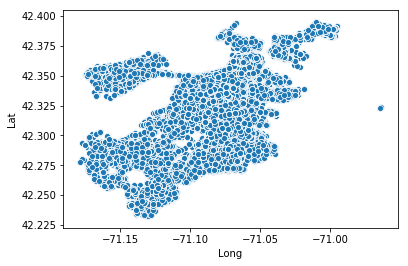

In [29]:
ax = sns.scatterplot(x="Long", y='Lat', data=location)

Matplotlib - example 2

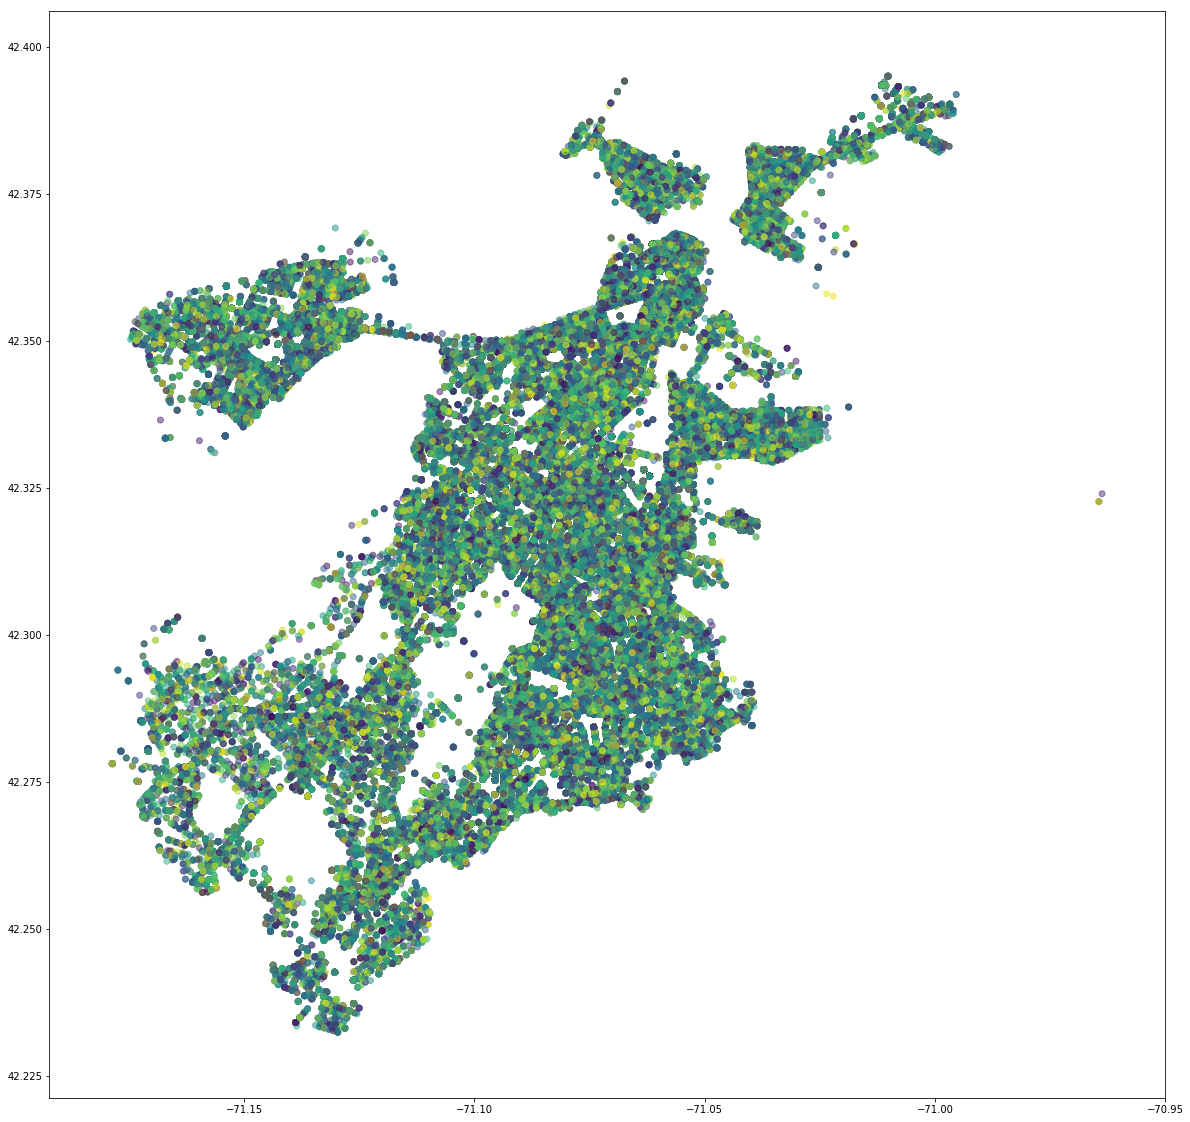

In [30]:
colors = np.random.rand(len(location))
plt.figure(figsize=(20,20))
plt.scatter(x,y,c=colors, alpha=0.5)
plt.show()

#### Using KMean with 2,3,5,10 clusters and Lat, Long columns

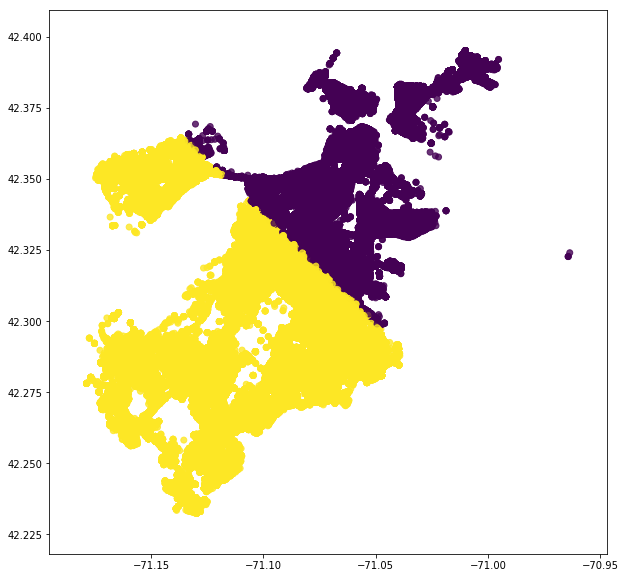

In [31]:
from sklearn.cluster import KMeans

#2 clusters
km = KMeans(n_clusters=2)
km.fit(X)
km.predict(X)
labels = km.labels_

fig = plt.figure(1, (10,10))
plt.scatter(x,y,c=labels, alpha=0.8)
plt.show()

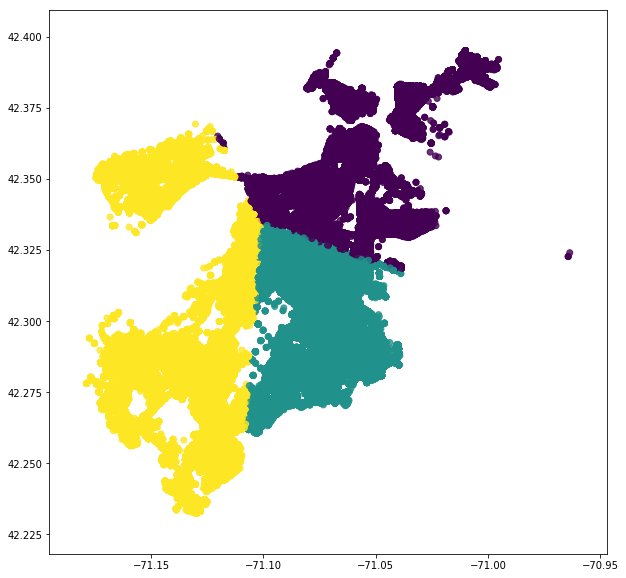

In [32]:
# 3 clusters
km = KMeans(n_clusters=3)
km.fit(X)
km.predict(X)
labels = km.labels_

fig = plt.figure(1, (10,10))
plt.scatter(x,y,c=labels, alpha=0.8)
plt.show()

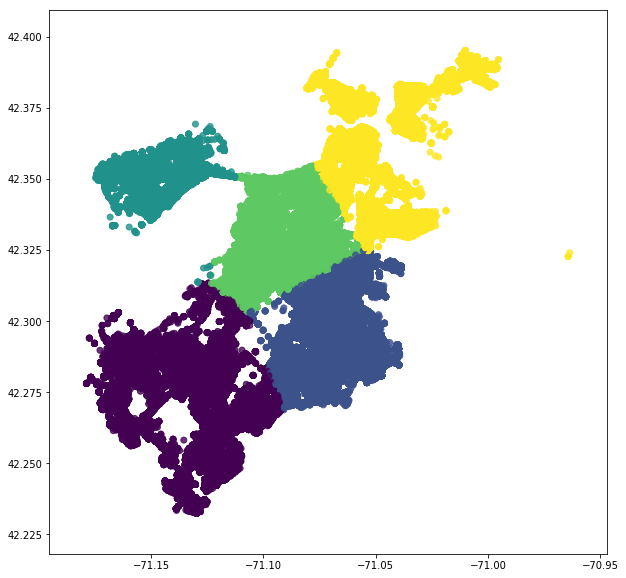

In [33]:
# 5 clusters
km = KMeans(n_clusters=5)
km.fit(X)
km.predict(X)
labels = km.labels_

fig = plt.figure(1, (10,10))
plt.scatter(x,y,c=labels, alpha=0.8)
plt.show()

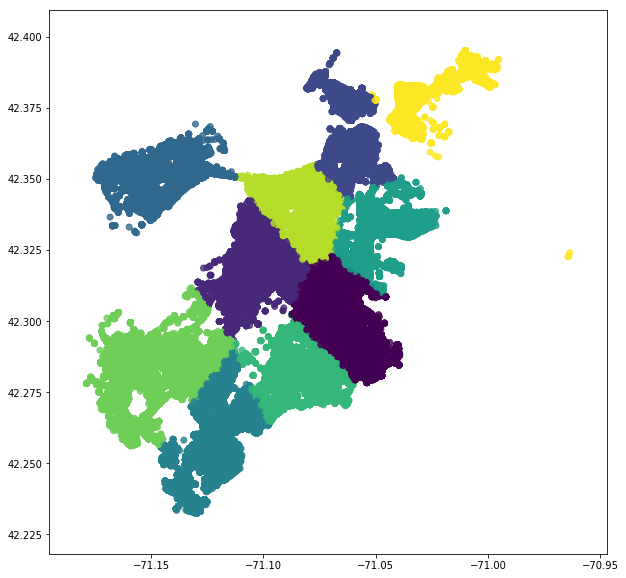

In [34]:
# 10 clusters
km = KMeans(n_clusters=10)
km.fit(X)
km.predict(X)
labels = km.labels_

fig = plt.figure(1, (10,10))
plt.scatter(x,y,c=labels, alpha=0.8)
plt.show()

## Combining columns

#### 1) Combine (location,OFFENSE_CODE)

In [35]:
locof = data[['OFFENSE_CODE', 'Long', 'Lat']]
locof = locof.dropna()
locof = locof.loc[(locof['Lat']>40) & (locof['Long']<-60)]

#fix values !!
X2 = locof.values
x2 = locof['Long']
y2 = locof['Lat']

locof.head(10)

,OFFENSE_CODE,Long,Lat
0,2403,-71.121186,42.262608
1,3201,-71.135311,42.352111
2,2647,-71.076930,42.308126
3,413,-71.059648,42.359454
4,3122,-71.024663,42.375258
5,1402,-71.060470,42.299197
6,3803,-71.056764,42.320734
7,3301,-71.103778,42.333807
8,802,-71.128025,42.256145
9,3410,-71.089363,42.348866


#### Plots showing KMeans for (location,OFFENSE_CODE) - with 2, 5 clusters

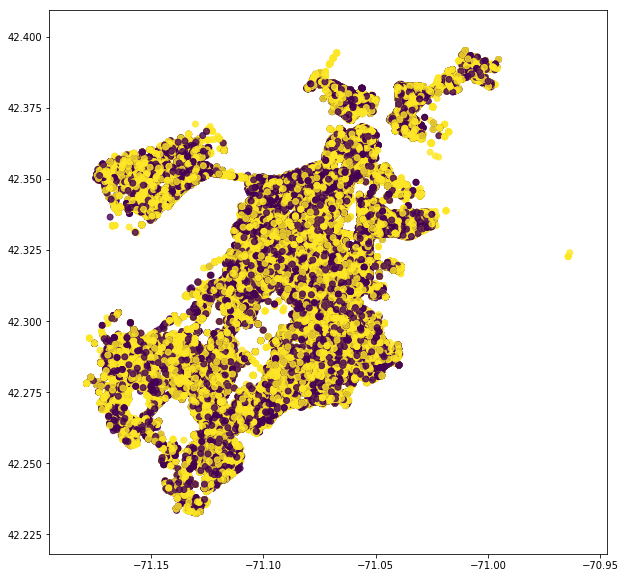

In [36]:
#2 clusters
km = KMeans(n_clusters=2)
km.fit(X2)
km.predict(X2)
labels = km.labels_


fig = plt.figure(1, (10,10))
plt.scatter(x2,y2,c=labels, alpha=0.8)
plt.show()

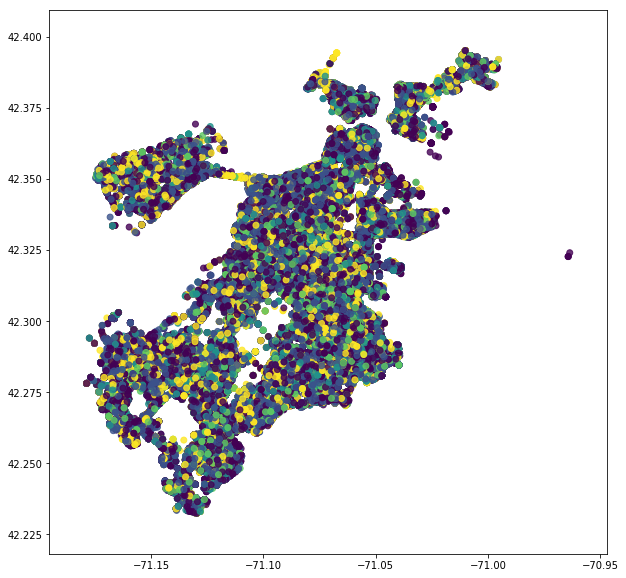

In [37]:
#5 clusters
km = KMeans(n_clusters=5)
km.fit(X2)
km.predict(X2)
labels = km.labels_


fig = plt.figure(1, (10,10))
plt.scatter(x2,y2,c=labels, alpha=0.8)
plt.show()

#### 2) Combine (location, MONTH)

In [38]:
locmon = data[['OFFENSE_CODE', 'Long', 'Lat']]
locmon = locmon.dropna()
locmon = locmon.loc[(locmon['Lat']>40) & (locmon['Long']<-60)]

#fix values !!
X3 = locmon.values
x3 = locmon['Long']
y3 = locmon['Lat']

locmon.head(10)

,OFFENSE_CODE,Long,Lat
0,2403,-71.121186,42.262608
1,3201,-71.135311,42.352111
2,2647,-71.076930,42.308126
3,413,-71.059648,42.359454
4,3122,-71.024663,42.375258
5,1402,-71.060470,42.299197
6,3803,-71.056764,42.320734
7,3301,-71.103778,42.333807
8,802,-71.128025,42.256145
9,3410,-71.089363,42.348866


#### Plots showing KMeans for (location,MONTH) - with 3, 10 clusters

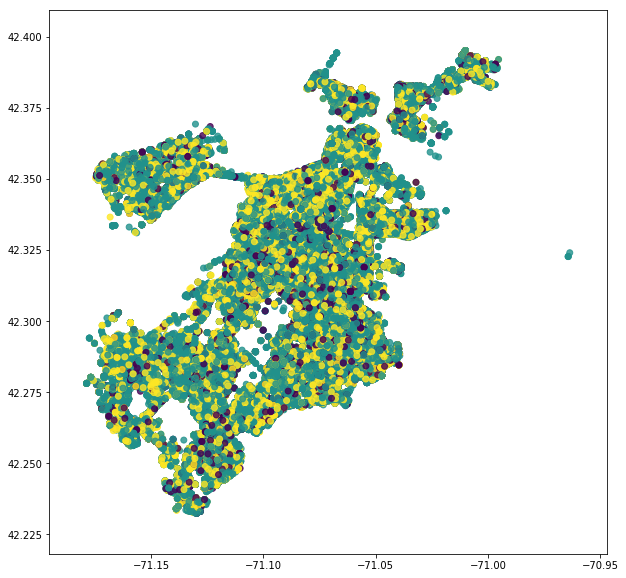

In [39]:
#3 clusters
km = KMeans(n_clusters=3)
km.fit(X3)
km.predict(X3)
labels = km.labels_


fig = plt.figure(1, (10,10))
plt.scatter(x3,y3,c=labels, alpha=0.8)
plt.show()

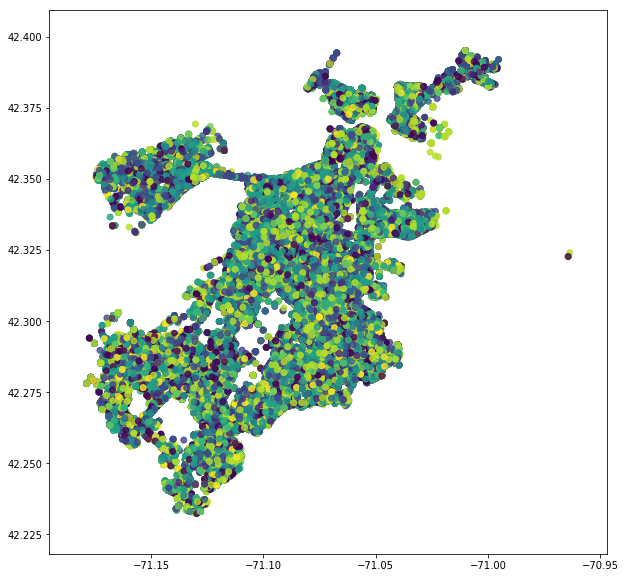

In [40]:
#10 clusters
km = KMeans(n_clusters=10)
km.fit(X3)
km.predict(X3)
labels = km.labels_


fig = plt.figure(1, (10,10))
plt.scatter(x3,y3,c=labels, alpha=0.8)
plt.show()

## Bonus: interactive clustering map

In [41]:
import folium
from folium.plugins import MarkerCluster

#get location of drug violations
new_data = data.loc[data["OFFENSE_CODE_GROUP"]=='Drug Violation'][["Lat","Long"]]
new_data = new_data.dropna()

mymap = folium.Map(location=[new_data['Lat'].mean(),new_data['Long'].mean()],zoom_start=6,tiles='cartodbpositron')
marker_cluster = MarkerCluster().add_to(mymap)

new_data.shape

/home/errikos/anaconda2/lib/python2.7/site-packages/folium/__init__.py:59: UserWarning: This version of folium is the last to support Python 2. Transition to Python 3 to be able to receive updates and fixes. Check out https://python3statement.org/ for more info.
  UserWarning


(15081, 2)

In [42]:
#save in html file

for pair in new_data.values:
    folium.Marker(
        location = list(pair),
        icon=None
    ).add_to(marker_cluster)

mymap.save('drug_locations.html')